<a href="https://colab.research.google.com/github/bhanusrinija04/Googlecolab/blob/main/Multi_class_classification_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.utils import to_categorical

(x_train,y_train),(x_test,y_test)=reuters.load_data(num_words=10000)



In [12]:
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1
    return results

x_train=vectorize_sequences(x_train)
x_test=vectorize_sequences(x_test)
num_classes=np.max(y_train)+1
y_train=to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)

model=Sequential()
model.add(Dense(64,activation='relu',input_shape=(10000,)))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=20,batch_size=512,validation_split=0.2)
model.evaluate(x_test,y_test)
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Test accuracy:',test_acc)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.2763 - loss: 3.3884 - val_accuracy: 0.5554 - val_loss: 2.1354
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.5138 - loss: 2.2113 - val_accuracy: 0.6071 - val_loss: 1.6739
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.5642 - loss: 1.8572 - val_accuracy: 0.6650 - val_loss: 1.5157
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.6065 - loss: 1.6232 - val_accuracy: 0.6839 - val_loss: 1.4115
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.6429 - loss: 1.5019 - val_accuracy: 0.6895 - val_loss: 1.3440
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.6587 - loss: 1.4179 - val_accuracy: 0.7001 - val_loss: 1.2986
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6801 - loss: 1.3209 - val_accuracy: 0.7201 - val_loss: 1.2233
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7019 - loss: 1.2488 - val_accuracy: 0.7318 - v

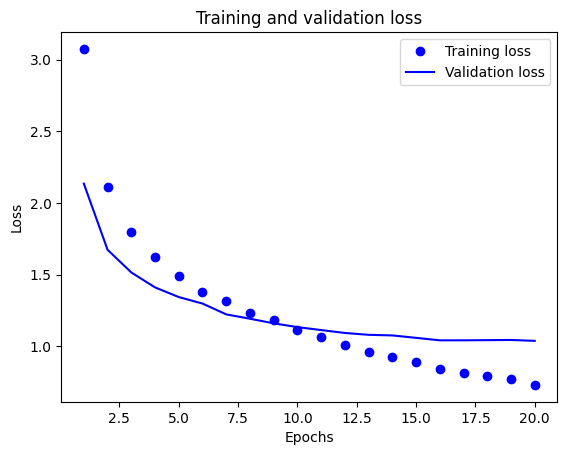

In [13]:
import matplotlib.pyplot as plt
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
